In [45]:
# mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
!pip3 install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").appName('Living wage ONS data analysis').getOrCreate()

In [48]:
ons_df = spark.read.option("header", "true").csv("/content/drive/MyDrive/ONS data Living wage/ONSdata1.csv")

In [ ]:
ons_df.show()

In [50]:
ons_df.select('Areaname').groupBy('Areaname').count().orderBy('count', ascending=False).show()

+--------------------+-----+
|            Areaname|count|
+--------------------+-----+
|             Croydon|    1|
|          Wandsworth|    1|
|              Bexley|    1|
|             Lambeth|    1|
|Barking and Dagenham|    1|
|              Camden|    1|
|           Greenwich|    1|
|              Newham|    1|
|              London|    1|
|       Tower Hamlets|    1|
|              Barnet|    1|
|            Hounslow|    1|
|              Harrow|    1|
|Kensington and Ch...|    1|
|           Islington|    1|
|               Brent|    1|
|            Haringey|    1|
|             Bromley|    1|
|              Merton|    1|
|         Westminster|    1|
+--------------------+-----+
only showing top 20 rows




**Percent earning less than London Living Wage (LLW) per hour for four random years**

```

```



In [51]:
ons_df1=ons_df.select('Areaname','20052','20107','201512','201829')
ons_df1.show()

+--------------------+-----+-----+------+------+
|            Areaname|20052|20107|201512|201829|
+--------------------+-----+-----+------+------+
|      City of London|  2.9|    4|   6.4|   0.9|
|Barking and Dagenham| 10.7| 13.7|    25|   4.8|
|              Barnet| 16.6| 19.6|  28.3|   4.1|
|              Bexley| 20.4| 24.3|  34.8|   4.6|
|               Brent| 18.7| 24.3|    32|     4|
|             Bromley| 25.3| 24.5|  27.2|   4.1|
|              Camden|  6.7|  7.7|  13.2|   1.5|
|             Croydon| 21.7| 16.1|  30.3|   3.6|
|              Ealing| 15.3| 16.8|  26.6|   3.5|
|             Enfield| 18.2| 19.9|  33.8|   4.7|
|           Greenwich| 16.2| 12.7|  26.1|   4.2|
|             Hackney| 11.1| 11.8|    24|   3.7|
|Hammersmith and F...|   11| 12.4|  19.7|   1.9|
|            Haringey| 15.9| 20.5|    32|   4.7|
|              Harrow| 21.9| 22.7|    38|   5.5|
|            Havering| 23.6| 18.5|  30.2|   4.3|
|          Hillingdon| 12.5| 11.7|  20.5|   3.1|
|            Hounslo

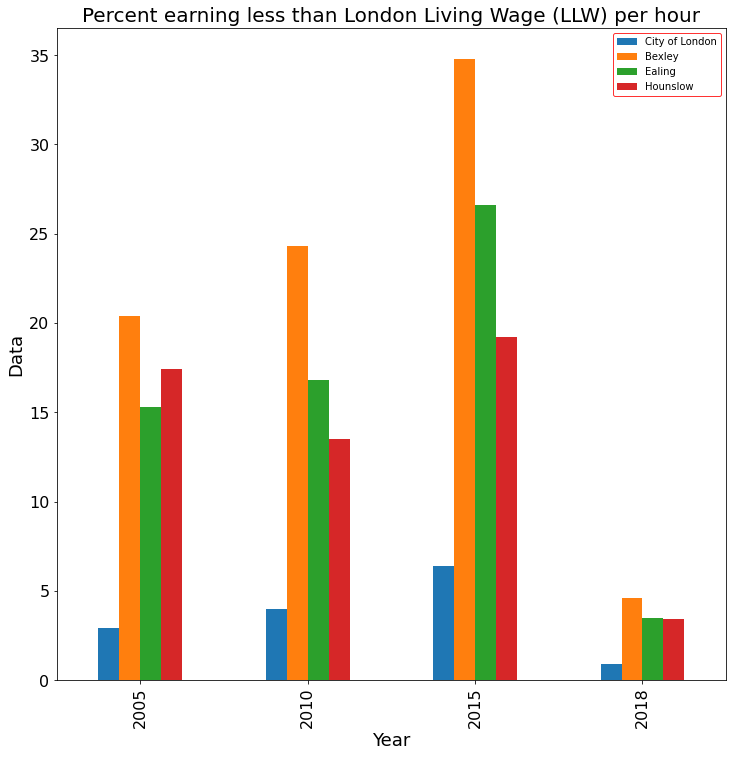

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

#create data dictionary
df1 = pd.DataFrame({'summary': ['2005', '2010', '2015','2018'],
                   ' City of London': [ 2.9, 4, 6.4, 0.9],
                   'Bexley': [20.4, 24.3, 34.8 , 4.6],
                   'Ealing': [ 15.3, 16.8,26.6, 3.5],
                   'Hounslow': [17.4, 13.5,19.2, 3.4]})

index=['City of London','Bexley','Ealing','Hounslow']


#plot columns on bar chart
df1[['summary', ' City of London','Bexley','Ealing','Hounslow']].plot(x='summary', kind='bar',logy=False,figsize=(12,12))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Year', fontsize=18,color='black')
plt.ylabel('Data', fontsize=18,color='black')
plt.title('Percent earning less than London Living Wage (LLW) per hour',fontsize=20,color='black')
plt.legend(index,loc="upper right",fontsize=10,edgecolor='red')
plt.show()

In [56]:
ons_df = spark.read.option("header", "true").csv("/content/drive/MyDrive/ONS data Living wage/onsdata2.csv")

In [57]:
ons_df.show()

+----+-------+--------------+---+-------+---------------+---+-------+-----------------+---+--------+--------------------+----+--------+----------------+----+--------+------------------+----+--------+--------------------+----+--------+----------------+----+--------+------------------+----+
| _c0|Number1|All employees%|CV3|Number4|Male employees%|CV6|Number7|Female employees%|CV9|Number10|Full-time employees%|CV12|Number13|Full-time males%|CV15|Number16|Full-time females%|CV18|Number19|Part-time employees%|CV21|Number22|Part-time males%|CV24|Number25|Part-time females%|CV27|
+----+-------+--------------+---+-------+---------------+---+-------+-----------------+---+--------+--------------------+----+--------+----------------+----+--------+------------------+----+--------+--------------------+----+--------+----------------+----+--------+------------------+----+
|2005|    446|          13.3|1.7|    188|           10.8|2.6|    258|             16.1|2.2|     206|                 7.7| 2.7|    

The estimated  % of employee jobs below the London living wage


In [59]:
ons_df2=ons_df.select('_c0','Male employees%','Female employees%','Full-time males%','Full-time females%')
ons_df2.show()

+----+---------------+-----------------+----------------+------------------+
| _c0|Male employees%|Female employees%|Full-time males%|Full-time females%|
+----+---------------+-----------------+----------------+------------------+
|2005|           10.8|             16.1|             6.8|                 9|
|2006|           10.3|             13.8|             6.7|               7.9|
|2007|           10.7|             14.9|             7.1|               8.5|
|2008|           10.9|             15.1|             7.1|               8.5|
|2009|           10.7|             15.2|             6.6|               8.4|
|2010|           11.1|             15.3|             6.8|               8.1|
|2011|           12.6|             17.3|             8.1|               9.1|
|2012|           14.5|             19.1|             9.4|              10.3|
|2013|           14.5|             20.6|             9.7|              11.6|
|2014|           16.5|             22.1|            10.8|              13.4|

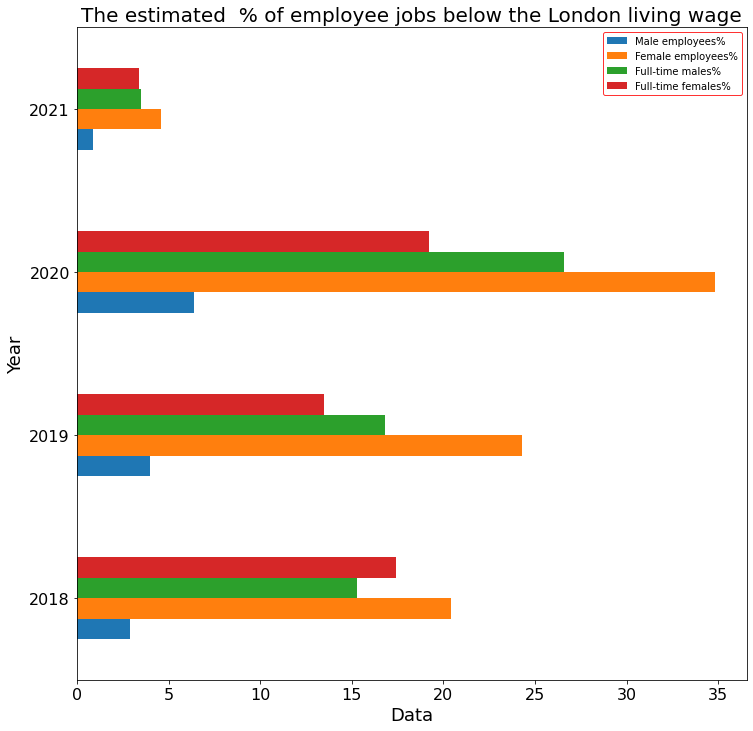

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

#create data dictionary
df1 = pd.DataFrame({'summary': ['2018', '2019', '2020','2021'],
                   ' Male employees%': [ 2.9, 4, 6.4, 0.9],
                   'Female employees%': [20.4, 24.3, 34.8 , 4.6],
                   'Full-time males%': [ 15.3, 16.8,26.6, 3.5],
                   'Full-time females%': [17.4, 13.5,19.2, 3.4]})

index=['Male employees%','Female employees%','Full-time males%','Full-time females%']


#plot columns on bar chart
df1[['summary', ' Male employees%','Female employees%','Full-time males%','Full-time females%']].plot(x='summary', kind='barh',logy=False,figsize=(12,12))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Data', fontsize=18,color='black')
plt.ylabel('Year', fontsize=18,color='black')
plt.title('The estimated  % of employee jobs below the London living wage',fontsize=20,color='black')
plt.legend(index,loc="upper right",fontsize=10,edgecolor='red')
plt.show()